In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import os
import glob
frames=[]
path="/content/drive/MyDrive/SummerInternship-Aparna/names/yob"
df = pd.DataFrame()
for f in range(2018,2021):
    # read the csv file
    s=str(f)
    s+=".txt"
    df1 = pd.read_csv(path+s, sep=",", header=None)
    frames.append(df1)
df = pd.concat(frames)

In [8]:
len(df)

95479

In [9]:
df.head()

,0,1,2
0,Emma,F,18770
1,Olivia,F,18011
2,Ava,F,14985
3,Isabella,F,14524
4,Sophia,F,13979


In [10]:
df=df.drop(labels=None, axis=0, columns=[2])
df.head()

,0,1
0,Emma,F
1,Olivia,F
2,Ava,F
3,Isabella,F
4,Sophia,F


In [11]:
#encoding  F as 0 and M as 1 
gender = {'M': 1,'F': 0}
df[1] = [gender[item] for item in df[1]]
print(df.head())

          0  1
0      Emma  0
1    Olivia  0
2       Ava  0
3  Isabella  0
4    Sophia  0


In [13]:
x= df.iloc[:,:1]
x.head()

,0
0,Emma
1,Olivia
2,Ava
3,Isabella
4,Sophia


In [15]:
vocab_f ='/content/drive/My Drive/MLProject_CS5439/glove.6B.50d.txt'

In [16]:
embeddings_index = {}
with open(vocab_f,encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [17]:

print(len(embeddings_index['happy']))

50


In [18]:
x=x.values.tolist()

In [19]:
X=[]
for i in x:
  word=i[0]
  X.append(word)

In [20]:
print(X[:7])

['Emma', 'Olivia', 'Ava', 'Isabella', 'Sophia', 'Charlotte', 'Mia']


In [21]:
len(X)

95479

In [22]:
#Padding with '@ each word to length 30
def padd(arr):
    for i in range(20-len(arr)):
        arr.append('@')
    return arr[:20]
for i in range(len(X)):
  li=[]
  one_name=X[i]
  for alphabet in one_name:
    li.append(alphabet)
  X[i]=padd(li)

print(X[0])
print(X[2])

['E', 'm', 'm', 'a', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@']
['A', 'v', 'a', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@']


In [23]:
# Each  letter of each word has been embedded into glove vector of size 50.
embedded_arr=[]
for each_word in X:
  embedded_arr.append([])
  
  for letter in each_word:
    if letter=='@':
        embedded_arr[-1].append([0]*50)       
    elif letter.lower() in embeddings_index:
        embedded_arr[-1].append(embeddings_index[letter.lower()])
    else:
      embedded_arr[-1].append([0]*50)
       
print(embedded_arr[0])

[array([ 0.73833 ,  0.65451 ,  1.0873  ,  0.86066 , -0.4834  , -0.9825  ,
       -0.1328  , -0.54704 ,  0.35356 ,  0.24776 , -0.55684 ,  0.76911 ,
       -0.22341 , -0.97246 ,  0.10125 , -1.0475  , -1.2904  , -0.65822 ,
        0.48172 , -0.3128  , -0.048045, -0.21534 ,  1.1261  ,  1.1538  ,
        0.14075 , -0.94391 , -0.31116 , -0.42186 , -0.099165, -0.78428 ,
        2.7546  , -0.24284 , -0.17702 , -0.081995, -0.54023 , -0.62769 ,
        0.014979, -0.35867 ,  0.38916 ,  0.25102 ,  2.0597  ,  0.37733 ,
        0.028691,  0.14071 ,  0.1621  ,  0.10083 ,  0.27499 , -0.16797 ,
        0.65622 ,  1.1014  ], dtype=float32), array([-0.47714 ,  1.7847  ,  1.3788  ,  1.0443  ,  0.50386 , -0.23525 ,
        0.6409  , -1.3447  , -0.091542, -0.87196 , -0.094991, -0.58697 ,
       -0.54982 , -1.0523  ,  0.42966 ,  0.10966 ,  0.5299  ,  0.9029  ,
       -1.5233  , -0.51371 , -0.73551 , -0.2591  ,  0.78334 , -0.18729 ,
        0.50978 ,  0.16163 ,  0.22219 , -0.072781, -0.64646 ,  0.28897 ,
    

In [24]:
print(len(embedded_arr))

95479


In [26]:
print(len(embedded_arr[0]))

20


In [27]:
X=np.array(embedded_arr)
print(np.shape(X))

(95479, 20, 50)


In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(np.array(df[1]).reshape(-1,1)).toarray()
print(np.shape(Y))

(95479, 2)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,LSTM,Input,Bidirectional
from sklearn.model_selection import cross_val_score 
from nltk.tokenize import word_tokenize,sent_tokenize
from ast import literal_eval
import nltk
from keras.layers import *
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
def BiLSTMModel(X,Y,input_size1,input_size2,output_size):
  m=Sequential()
  m.add(Bidirectional(LSTM(20,input_shape=(input_size1,input_size2))))
  m.add(Dropout(0.5))
  m.add(Dense(output_size,activation='softmax'))
  m.compile('Adam','categorical_crossentropy',['accuracy'])
  m.fit(X,Y,epochs=10, batch_size=128)
  return m

In [32]:
bilstmModel=BiLSTMModel(X_train,Y_train,20,50,2)

Epoch 1/10
597/597 [==============================] - 35s 6ms/step - loss: 0.5625 - accuracy: 0.6962
Epoch 2/10
597/597 [==============================] - 3s 6ms/step - loss: 0.4410 - accuracy: 0.8053
Epoch 3/10
597/597 [==============================] - 3s 6ms/step - loss: 0.4379 - accuracy: 0.8063
Epoch 4/10
597/597 [==============================] - 3s 6ms/step - loss: 0.4261 - accuracy: 0.8129
Epoch 5/10
597/597 [==============================] - 3s 6ms/step - loss: 0.4171 - accuracy: 0.8157
Epoch 6/10
597/597 [==============================] - 3s 6ms/step - loss: 0.4117 - accuracy: 0.8202
Epoch 7/10
597/597 [==============================] - 4s 6ms/step - loss: 0.4052 - accuracy: 0.8240
Epoch 8/10
597/597 [==============================] - 4s 6ms/step - loss: 0.4022 - accuracy: 0.8238
Epoch 9/10
597/597 [==============================] - 4s 6ms/step - loss: 0.3960 - accuracy: 0.8262
Epoch 10/10
597/597 [==============================] - 4s 6ms/step - loss: 0.3931 - accuracy: 0.827

In [33]:
bilstmModel.evaluate(X_test,Y_test)

597/597 [==============================] - 3s 3ms/step - loss: 0.3779 - accuracy: 0.8338


[0.3779146373271942, 0.8338395357131958]

In [34]:
Y_Pred=bilstmModel.predict(X_test)
print(Y_Pred[0])

[0.06399713 0.93600285]


In [35]:
round_preds = np.around(Y_Pred)
print(round_preds[0])

[0. 1.]


In [37]:
class_preds = np.argmax(round_preds, axis=-1)
print(class_preds[:10])

[1 0 0 0 0 0 1 0 0 0]


In [40]:
Y_test = np.argmax(Y_test, axis=-1)
print(Y_test[:10])

[1 0 0 0 1 0 1 0 1 0]


In [41]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,class_preds)
print(cf)

[[8917 1849]
 [1324 7006]]


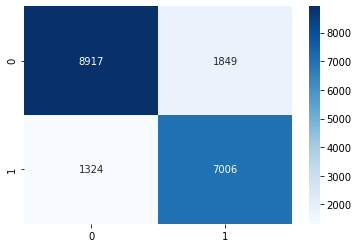

In [42]:
import seaborn as sns
sns.heatmap(cf, annot=True,cmap='Blues',fmt="d")

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,class_preds)

0.833839547549225